In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#load generator data
gds = {}
gds[2019] = pickle.load(open('Data/generator_data_short_WECC_2019.obj', 'rb'))
gds[2020] = pickle.load(open('Data/generator_data_short_WECC_2020.obj', 'rb'))

colorset = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499']
'''Color list:
indigo, cyan, teal, green, sand, rose, wine, olive, purple
uncontrolled, color = colorset[0], '-*'
mef normal all access, color = colorset[4], '-X'
mef normal plugged, color = colorset[6]
aef all access, color = colorset[3], 
aef plugged, color = colorset[1]
mef cascade all access, color = colorset[5]
mef cascade plugged, color = colorset[8]
'''

path_string = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/MEF/'
path_string_aef = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/AEF/'
path_string_cascade = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/MEF_Cascade/'
path_string_2030 = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/MEF_2030/'
path_string_aef_2030 = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/AEF_2030/'
path_string_cascade_2030 = '/Users/sonia/OneDrive - Stanford/GreenCharging_SharedResults/MEF_2030_Cascade/'
result_dates = ['20231207']

In [2]:
def results_gperkwh_fxn_avg(numev_set, path_string, run_numbers, result_date, current_year = None, month=1):
    '''Function to calculate average g/kWh for each run number and number of EVs added'''
    if current_year == 2030:
        #use 2020 for uncontrolled data
        dpdf_year = '2020'
        #get reference baseline projected 2030 demand

        reference_df = pd.read_csv('Results/' +'2030_dpdf_'+'20220522'+ '.csv')

    #default = 2020
    else:
        dpdf_year = '2020'
        reference_df = pd.read_csv('Results/2020_dpdf_20220522.csv')

    if month == 1:
        time_period_string = '2020-01-01_to_2020-01-31'
    elif month == 7: 
        time_period_string = '2020-07-01_to_2020-07-31'

    results_gperkwh_avg = pd.DataFrame(index=numev_set, columns=['uncontrolled', 'uncontrolled_2s', 'varying_access', 'varying_plugged', 'varying_access_2s', 'varying_plugged_2s'])
    for num_evs in numev_set:
        results_gperkwh = pd.DataFrame(index=run_numbers, columns=['uncontrolled', 'varying_access', 'varying_plugged'])
        for run_number in run_numbers:
            
            df_total_uncontrolled = {}; df_uncontrolled_dpdf = {}
            df_controlled_dpdf = {'varying':{'access':{}, 'plugged':{}}}
            df_total_controlled = { 'varying':{'access':{}, 'plugged':{}}}
    
            #save uncontrolled demand data in df
            df_total_uncontrolled[num_evs] = pd.read_csv(path_string + str(num_evs)+'EVs_added/Uncontrolled/demand_run'+run_number+'_'+time_period_string+'_'+result_date+'.csv', index_col=0)
            
            df_total_uncontrolled[num_evs].datetime = pd.to_datetime(df_total_uncontrolled[num_evs].datetime)
            df_uncontrolled_dpdf[num_evs] = pd.read_csv(path_string +str(num_evs)+'EVs_added/Uncontrolled/results_'+dpdf_year+'_run'+run_number+'_'+time_period_string+'_dpdf_'+result_date+'.csv')
            df_uncontrolled_dpdf[num_evs].datetime = pd.to_datetime(df_uncontrolled_dpdf[num_evs].datetime)
            
            for signal1 in ['varying']:
                try: #if have both plugged and access saved
                    for signal2 in ['access', 'plugged']:
                        df_total_controlled[signal1][signal2][num_evs] = pd.read_csv(path_string +str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/demand_run'+run_number+'_'+time_period_string+'_'+result_date+'.csv', index_col=0)
                        df_total_controlled[signal1][signal2][num_evs].datetime = pd.to_datetime(df_total_controlled[signal1][signal2][num_evs].datetime)
                        df_controlled_dpdf[signal1][signal2][num_evs] = pd.read_csv(path_string+str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/results_'+dpdf_year+'_run'+run_number+'_'+time_period_string+'_dpdf_'+result_date+'.csv')
                        df_controlled_dpdf[signal1][signal2][num_evs].datetime = pd.to_datetime(df_controlled_dpdf[signal1][signal2][num_evs].datetime)
                except: #if don't have plugged and access saved
                    try:
                        for signal2 in ['access']:
                            df_total_controlled[signal1][signal2][num_evs] = pd.read_csv(path_string +str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/demand_run'+run_number+'_'+time_period_string+'_'+result_date+'.csv', index_col=0)
                            df_total_controlled[signal1][signal2][num_evs].datetime = pd.to_datetime(df_total_controlled[signal1][signal2][num_evs].datetime)
                            df_controlled_dpdf[signal1][signal2][num_evs] = pd.read_csv(path_string+str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/results_'+dpdf_year+'_run'+run_number+'_'+time_period_string+'_dpdf_'+result_date+'.csv')
                            df_controlled_dpdf[signal1][signal2][num_evs].datetime = pd.to_datetime(df_controlled_dpdf[signal1][signal2][num_evs].datetime)
                    except:
                        for signal2 in ['plugged']:
                            df_total_controlled[signal1][signal2][num_evs] = pd.read_csv(path_string +str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/demand_run'+run_number+'_'+time_period_string+'_'+result_date+'.csv', index_col=0)
                            df_total_controlled[signal1][signal2][num_evs].datetime = pd.to_datetime(df_total_controlled[signal1][signal2][num_evs].datetime)
                            df_controlled_dpdf[signal1][signal2][num_evs] = pd.read_csv(path_string+str(num_evs)+'EVs_added/Controlled_'+str(signal1)+'_allaccess_'+str(signal2)+'_series/results_'+dpdf_year+'_run'+run_number+'_'+time_period_string+'_dpdf_'+result_date+'.csv')
                            df_controlled_dpdf[signal1][signal2][num_evs].datetime = pd.to_datetime(df_controlled_dpdf[signal1][signal2][num_evs].datetime)

            #find dates to plot (inds)
            signal1 = 'varying'
            signal2 = 'access'
            try:
                dpdf_inds = df_uncontrolled_dpdf[num_evs][df_uncontrolled_dpdf[num_evs].datetime.dt.date.isin(df_total_controlled[signal1][signal2][num_evs].datetime.dt.date.unique())].index
            except:
                signal2 = 'plugged'
                dpdf_inds = df_uncontrolled_dpdf[num_evs][df_uncontrolled_dpdf[num_evs].datetime.dt.date.isin(df_total_controlled[signal1][signal2][num_evs].datetime.dt.date.unique())].index

            delta_co2 = df_uncontrolled_dpdf[num_evs].loc[dpdf_inds, 'co2_tot'].sum() - reference_df.loc[dpdf_inds, 'co2_tot'].sum()
            delta_demand = df_uncontrolled_dpdf[num_evs].loc[dpdf_inds, 'demand'].sum() - reference_df.loc[dpdf_inds, 'demand'].sum()
            #print(num_evs, run_number, delta_co2)
            #print(num_evs, run_number, delta_demand)

            
            results_gperkwh.loc[run_number, 'uncontrolled'] = delta_co2/delta_demand
            
            signal1 = 'varying'
            signal2_set = ['access', 'plugged']
            try:
                for signal2 in signal2_set:
                    delta_co2 = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'co2_tot'].sum() - reference_df.loc[dpdf_inds, 'co2_tot'].sum()
                    delta_demand = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'demand'].sum() - reference_df.loc[dpdf_inds, 'demand'].sum()
                    results_gperkwh.loc[run_number, signal1+'_'+signal2] = delta_co2/delta_demand
            except:
                try:
                    for signal2 in ['access']:
                        delta_co2 = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'co2_tot'].sum() - reference_df.loc[dpdf_inds, 'co2_tot'].sum()
                        delta_demand = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'demand'].sum() - reference_df.loc[dpdf_inds, 'demand'].sum()
                        results_gperkwh.loc[run_number, signal1+'_'+signal2] = delta_co2/delta_demand
                except:
                    for signal2 in ['plugged']:
                        delta_co2 = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'co2_tot'].sum() - reference_df.loc[dpdf_inds, 'co2_tot'].sum()
                        delta_demand = df_controlled_dpdf[signal1][signal2][num_evs].loc[dpdf_inds, 'demand'].sum() - reference_df.loc[dpdf_inds, 'demand'].sum()
                        results_gperkwh.loc[run_number, signal1+'_'+signal2] = delta_co2/delta_demand

        results_gperkwh_avg.loc[num_evs, 'uncontrolled'] = np.average(results_gperkwh.loc[:, 'uncontrolled'])
        results_gperkwh_avg.loc[num_evs, 'varying_access'] = np.nanmean(results_gperkwh.loc[:, 'varying_access'])
        results_gperkwh_avg.loc[num_evs, 'varying_plugged'] = np.nanmean(results_gperkwh.loc[:, 'varying_plugged'])
        results_gperkwh_avg.loc[num_evs, 'uncontrolled_2s'] = 2 * np.std(results_gperkwh.loc[:, 'uncontrolled'])
        results_gperkwh_avg.loc[num_evs, 'varying_access_2s'] = 2 * np.std(results_gperkwh.loc[:, 'varying_access'])
        results_gperkwh_avg.loc[num_evs, 'varying_plugged_2s'] = 2 * np.std(results_gperkwh.loc[:, 'varying_plugged'])

    return results_gperkwh_avg

In [3]:
def multi_run_plot(numev_set, results_gperkwh, results_gperkwh_aef, results_cascade, fig, axes, year2030=False, aef=False, title=False, save_name='totalemissions_adding_evs', to_plot = [0], cascade_2 = None, max_lim=675, legend_pos='lower right'):

    xvals = numev_set
    #uncontrolled, color = colorset[0]
    #mef normal all access, color = colorset[4]
    #mef normal plugged, color = colorset[6]
    #aef all access, color = colorset[3]
    #aef plugged, color = colorset[1]
    #mef cascade all access, color = colorset[5]
    #mef cascade plugged, color = colorset[8]

    if np.sum(np.isin(0, to_plot)): # uncontrolled
        axes.plot(xvals, results_gperkwh.uncontrolled, '*', label='Uncontrolled', color = colorset[0], markersize=18)
        axes.fill_between(xvals, np.array(results_gperkwh.uncontrolled - results_gperkwh.uncontrolled_2s, dtype=float), np.array(results_gperkwh.uncontrolled + results_gperkwh.uncontrolled_2s, dtype=float), alpha=0.6, linewidth=.6,color = colorset[0])
    
    if np.sum(np.isin(1, to_plot)): #sr-mef max sessions
        axes.plot(xvals, results_gperkwh.varying_access, 'X', label='MEF, Max. Sessions', color=colorset[4], markersize=11)
        axes.fill_between(xvals, np.array(results_gperkwh.varying_access - results_gperkwh.varying_access_2s, dtype=float), np.array(results_gperkwh.varying_access + results_gperkwh.varying_access_2s, dtype=float), alpha=0.6, linewidth=.6,color = colorset[4])
    
    if np.sum(np.isin(2, to_plot)): #sr-mef existing sessions
        axes.plot(xvals, results_gperkwh.varying_plugged, 'o', label='MEF, Existing Sessions', color=colorset[6], markersize=13)
        axes.fill_between(xvals, np.array(results_gperkwh.varying_plugged - results_gperkwh.varying_plugged_2s, dtype=float), np.array(results_gperkwh.varying_plugged + results_gperkwh.varying_plugged_2s, dtype=float), alpha=0.6, linewidth=.6,color = colorset[6])

    if np.sum(np.isin(3, to_plot)): #aef max sessions
        axes.plot(xvals, results_gperkwh_aef.varying_access, 's',  label='AEF, Max. Sessions', color=colorset[3], markersize=13)
        axes.fill_between(xvals, np.array(results_gperkwh_aef.varying_access - results_gperkwh_aef.varying_access_2s, dtype=float), np.array(results_gperkwh_aef.varying_access + results_gperkwh_aef.varying_access_2s, dtype=float), alpha=0.6, linewidth=.6, color = colorset[3])
    
    if np.sum(np.isin(4, to_plot)): #aef existing sessions
        axes.plot(xvals, results_gperkwh_aef.varying_plugged, 'P',  label='AEF, Existing Sessions', color=colorset[1], markersize=14)
        axes.fill_between(xvals, np.array(results_gperkwh_aef.varying_plugged - results_gperkwh_aef.varying_plugged_2s, dtype=float), np.array(results_gperkwh_aef.varying_plugged + results_gperkwh_aef.varying_plugged_2s, dtype=float), alpha=0.6, linewidth=.6, color = colorset[1])


    if cascade_2 is None:
        if np.sum(np.isin(5, to_plot)): #mef cascade all access 20 groups
            axes.plot(xvals, results_cascade.varying_access, 'd', label='Cascading MEF, Max. Sessions', color = colorset[5], markersize=14)
            axes.fill_between(xvals, np.array(results_cascade.varying_access - results_cascade.varying_access_2s, dtype=float), np.array(results_cascade.varying_access + results_cascade.varying_access_2s, dtype=float), alpha=0.6, linewidth=.6, color = colorset[5])

        if np.sum(np.isin(6, to_plot)): #mef cascade plugged 20 groups
            axes.plot(xvals, results_cascade.varying_plugged, 'H', label='Cascading MEF, Existing Sessions', color = colorset[8], markersize=14)
            axes.fill_between(xvals, np.array(results_cascade.varying_plugged - results_cascade.varying_plugged_2s, dtype=float), np.array(results_cascade.varying_plugged + results_cascade.varying_plugged_2s, dtype=float),alpha=0.6, linewidth=.6, color = colorset[8])

    else:
        if np.sum(np.isin(5, to_plot)): #mef cascade all access group size 50,000
            axes.plot(xvals, results_cascade.varying_access, 'd', label='Max. Sesions, Group Size 50,000', color = colorset[3], markersize=14)
            axes.fill_between(xvals, np.array(results_cascade.varying_access - results_cascade.varying_access_2s, dtype=float), np.array(results_cascade.varying_access + results_cascade.varying_access_2s, dtype=float), alpha=0.6, linewidth=.6, color = colorset[3])

        if np.sum(np.isin(6, to_plot)): #mef cascade plugged group size 50,000
            axes.plot(xvals, results_cascade.varying_plugged, 'H', label='Existing Sessions, Group Size 50,000', color = colorset[8], markersize=14)
            axes.fill_between(xvals, np.array(results_cascade.varying_plugged - results_cascade.varying_plugged_2s, dtype=float), np.array(results_cascade.varying_plugged + results_cascade.varying_plugged_2s, dtype=float), alpha=0.6, linewidth=.6, color = colorset[8])

        if np.sum(np.isin(7, to_plot)): #mef cascade all access group size 100,000
            axes.plot(xvals, cascade_2.varying_access, '+', label='Max. Sessions, Group Size 100,000', color = colorset[1], markersize=14)
            axes.fill_between(xvals, np.array(cascade_2.varying_access - cascade_2.varying_access_2s, dtype=float), np.array(cascade_2.varying_access + cascade_2.varying_access_2s, dtype=float), alpha=0.6, linewidth=.6, color = colorset[1])

        if np.sum(np.isin(8, to_plot)): #mef cascade plugged group size 100,000
            axes.plot(xvals, cascade_2.varying_plugged, 'x', label='Existing Sessions, Group Size 50,000', color = colorset[4], markersize=14)
            axes.fill_between(xvals, np.array(cascade_2.varying_plugged - cascade_2.varying_plugged_2s, dtype=float), np.array(cascade_2.varying_plugged + cascade_2.varying_plugged_2s, dtype=float), alpha=0.6, linewidth=.6,color = colorset[4])
        

    axes.set_xlim([-100000,numev_set[-1]+100000])
    axes.set_xticks(np.linspace(0,numev_set[-1],5))
    axes.set_xticklabels(np.linspace(0, numev_set[-1], 5, dtype=int), fontsize=16)

    axes.set_xlabel('Number of EVs Added', fontsize=18)
   
    axes.set_yticks(np.arange(350, max_lim, 50))
    axes.set_yticklabels(np.arange(350, max_lim, 50), fontsize=18)
    axes.set_ylabel('Added CO$_2$ Emissions [kg/MWh]', fontsize=18)
    axes.legend(fontsize=13.5, loc=4)
 
    axes.legend(fontsize=14.5, loc=legend_pos)
    axes.grid(axis='y')
    if title:
        pass

    plt.tight_layout()
    plt.savefig('Added_Emissions/'+save_name+'.pdf', bbox_inches='tight')
    plt.show()
    return 
    

# Figure 4a

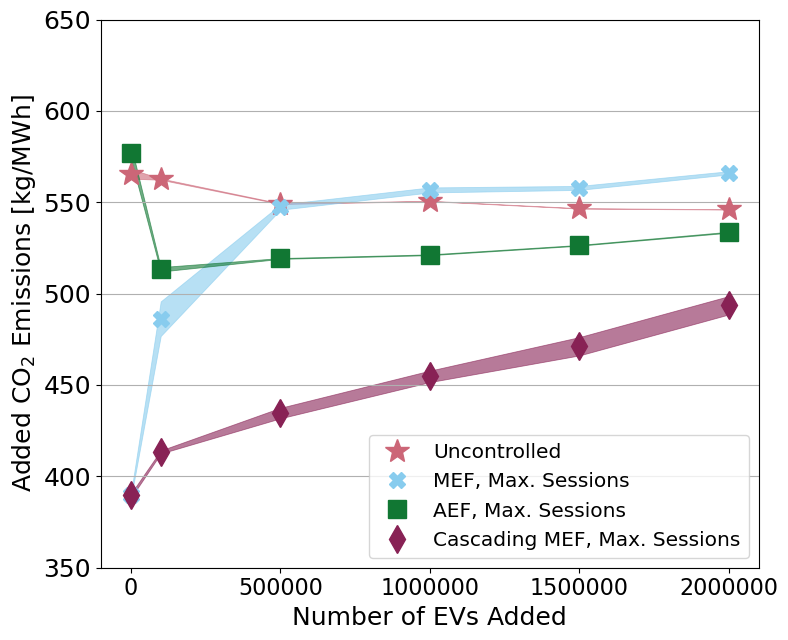

In [4]:
#run custom added emissions plot
run_nums = [str(i) for i in range(15)]

added_EVs = [1000,100000, 500000, 1000000, 1500000, 2000000]
fig1, axes1 = plt.subplots(figsize=(8,6.5))

#get SR-MEF
results_gperkwh = results_gperkwh_fxn_avg(added_EVs, path_string, run_nums, result_dates[0])

#get AEF
results_gperkwh_aef = results_gperkwh_fxn_avg(added_EVs, path_string_aef, run_nums, result_dates[0])

results_cascade = pd.DataFrame(columns = ['uncontrolled', 'varying_access', 'varying_plugged'])

for i, num_evs in enumerate(added_EVs):
    temp = results_gperkwh_fxn_avg([num_evs], path_string_cascade, run_nums, result_dates[0])
    results_cascade.loc[num_evs, 'varying_access'] = temp.loc[num_evs, 'varying_access'] 
    results_cascade.loc[num_evs, 'varying_access_2s'] = temp.loc[num_evs, 'varying_access_2s'] 
    results_cascade.loc[num_evs, 'varying_plugged'] = temp.loc[num_evs, 'varying_plugged'] 
    results_cascade.loc[num_evs, 'varying_plugged_2s'] = temp.loc[num_evs, 'varying_plugged_2s'] 


multi_run_plot(added_EVs, results_gperkwh, results_gperkwh_aef, results_cascade, fig1, axes1, title=False, save_name='4b_added_emissions_jan_20_max', to_plot = [0,1, 3,5]) 



In [5]:
print('1,000      & '+ str(np.round(results_gperkwh.uncontrolled[1000],1))  +' & ' + str(np.round(results_gperkwh.varying_access[1000],1))       +' & ' + str(np.round(results_gperkwh_aef.varying_access[1000],1)) + ' & ' + str(np.round(results_cascade.varying_access[1000],1)) + '\\' + '\\')
print('100,000    & '+ str(np.round(results_gperkwh.uncontrolled[100000],1))  +' & ' + str(np.round(results_gperkwh.varying_access[100000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_access[100000],1)) + ' & ' + str(np.round(results_cascade.varying_access[100000],1)) + '\\' + '\\')
print('500,000    & '+ str(np.round(results_gperkwh.uncontrolled[500000],1))  +' & ' + str(np.round(results_gperkwh.varying_access[500000],1))   + ' & ' + str(np.round(results_gperkwh_aef.varying_access[500000],1)) + ' & ' + str(np.round(results_cascade.varying_access[500000],1)) + '\\' + '\\')
print('1,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[1000000],1))  +' & ' + str(np.round(results_gperkwh.varying_access[1000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_access[1000000],1)) + ' & ' + str(np.round(results_cascade.varying_access[1000000],1)) + '\\' + '\\')
print('1,500,000  & '+ str(np.round(results_gperkwh.uncontrolled[1500000],1))  +' & ' + str(np.round(results_gperkwh.varying_access[1500000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_access[1500000],1)) + ' & ' + str(np.round(results_cascade.varying_access[1500000],1)) + '\\' + '\\')
print('2,000,000  & '+ str(np.round(results_gperkwh.uncontrolled[2000000],1))  +' & ' + str(np.round(results_gperkwh.varying_access[2000000],1)) + ' & ' + str(np.round(results_gperkwh_aef.varying_access[2000000],1)) + ' & ' + str(np.round(results_cascade.varying_access[2000000],1)) + '\\' + '\\')

1,000      & 565.5 & 389.8 & 577.0 & 389.5\\
100,000    & 562.7 & 486.3 & 513.3 & 413.3\\
500,000    & 549.2 & 547.3 & 519.2 & 434.6\\
1,000,000  & 550.7 & 556.7 & 521.3 & 454.7\\
1,500,000  & 546.6 & 557.8 & 526.4 & 471.2\\
2,000,000  & 546.1 & 566.1 & 533.6 & 493.6\\
